<a href="https://colab.research.google.com/github/CriptoQuant/Informacion-Cuantica/blob/main/CorrecionErroresFase(3%2C1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Circuito corrector de 3 qubits para detectar y corregir la fase de 1 qubit

Si detecta un error de fase (Z) aplica otra Z al final, si no, no hace nada

Usa q1 y q2 de qubits ancila
'''

In [ ]:
!pip install qiskit ipywidgets
!pip install pylatexenc
!pip install matplotlib
!pip install qiskit-aer

In [152]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit import *
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate, XGate

In [233]:
n=3
qc = QuantumCircuit(n,3)

#Estado de Alice |ψ⟩ = α|0⟩ + β|1⟩

alpha = 1/ np.sqrt(2)
beta = 1/ np.sqrt(2)
qc.initialize([alpha, beta], 0)
qc.barrier()

# Aplicar CNOT
qc.cx(0,1)
qc.cx(0,2)
qc.barrier()

# Aplicar Hadamard
for i in range(n):
    qc.h(i)

qc.barrier()


# Puerta de introducción de error de fase
qc.z(0)
qc.barrier()


# Aplicar Hadamard
for i in range(n):
    qc.h(i)

qc.barrier()

# Aplicar CNOT
qc.cx(0,1)
qc.cx(0,2)
#qc.ccx(1,2,0)
qc.barrier()


# Mediciones
qc.measure([1, 2], [0, 1])
qc.barrier()

sim = Aer.get_backend('qasm_simulator')
my_circuit = transpile(qc, sim)
job = sim.run(my_circuit)
result = job.result()
counts = result.get_counts()
print("Resultado:", counts)
outcome = max(counts, key=counts.get)

if outcome == "011":
  qc.z(0)
qc.measure(0,2)

Resultado: {'011': 1024}


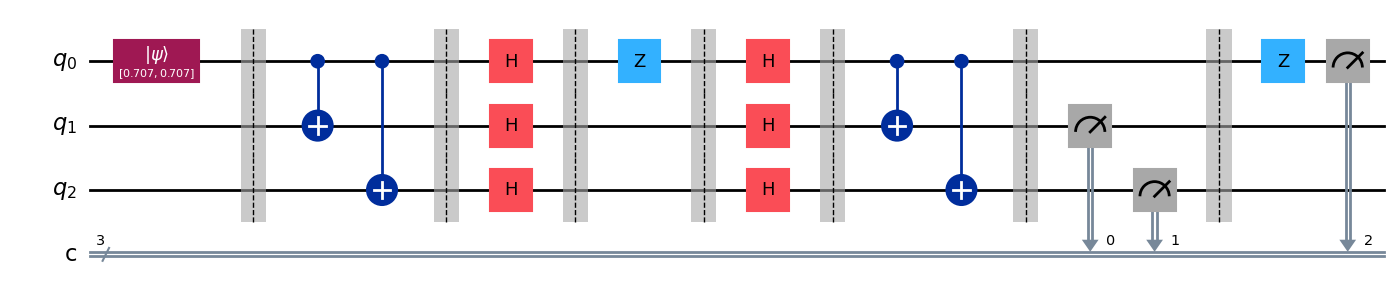

In [234]:
# Dibujar el circuito
qc.draw('mpl')

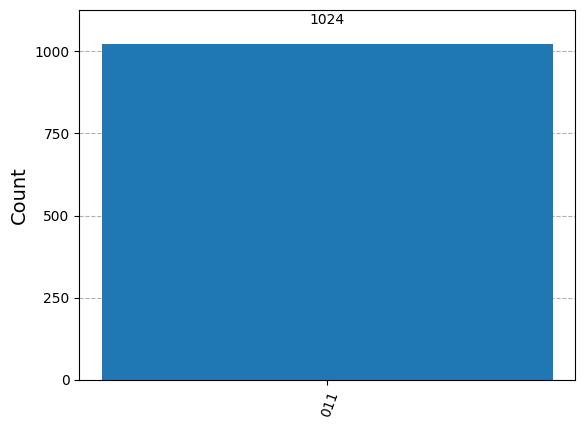

In [235]:
plot_histogram(counts)